                                A Project of Data Analysis on SUPERSTORE SALES (2015-2019) Dataset
                                __________________________________________________________________
                                ------------------------------------------------------------------

In [10]:
#import the necessary Libraries
import pandas as pd              #importing pandas library as pd for working with datasets
import numpy as np               #importing numpy library as np for mathematical operations on arrays
import matplotlib.pyplot as plt  #importing numpy matplotlib.pyplot as plt for data visualization

In [11]:

df = pd.read_csv('Superstore Sales Dataset.csv')    #reading the data from the csv file and converting it into a dataframe


In [65]:

df.head()  #by default head shows the first five rows of the table


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


After viewing this table we can have some idea about the data that what kind of data it is.


In [66]:

df.info()  #info() method prints information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

The information contains the number of columns,column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
By viewing this we can say that there is only one column where null values are present. That column is Postal Code column.


In [3]:
#'Row ID' column in the table has no use because by default we are getting index numbers of the rows so we can drop the column

df.drop('Row ID', axis=1, inplace=True)   #dropping the column 'Row ID'

df.info()                                 #Showing the information of the dataset after dropping the column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


We can see the column named 'Row ID' has removed or droped

In [4]:
#checking if any duplicate values are present
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
1


In [69]:
print(df[df.duplicated()])    #display the duplicated row

            Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
3406  US-2015-150119  23/04/2015  27/04/2015  Standard Class    LB-16795   

       Customer Name      Segment        Country      City State  Postal Code  \
3406  Laurel Beltran  Home Office  United States  Columbus  Ohio      43229.0   

     Region       Product ID   Category Sub-Category  \
3406   East  FUR-CH-10002965  Furniture       Chairs   

                                           Product Name    Sales  
3406  Global Leather Highback Executive Chair with P...  281.372  


In [5]:
#Removing duplicate row
print("Number of duplicate rows:")
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

Number of duplicate rows:
0


Now there is no duplicate values in the table

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   #convert shipping dates to pandas datetime format


In [7]:

df['Order Month'] = df['Order Date'].dt.month         # Extract the month from 'Order Date'
df['Order Year'] = df['Order Date'].dt.year           # Extract the Year from 'Order Date'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9799 non-null   object        
 1   Order Date     9799 non-null   datetime64[ns]
 2   Ship Date      9799 non-null   datetime64[ns]
 3   Ship Mode      9799 non-null   object        
 4   Customer ID    9799 non-null   object        
 5   Customer Name  9799 non-null   object        
 6   Segment        9799 non-null   object        
 7   Country        9799 non-null   object        
 8   City           9799 non-null   object        
 9   State          9799 non-null   object        
 10  Postal Code    9788 non-null   float64       
 11  Region         9799 non-null   object        
 12  Product ID     9799 non-null   object        
 13  Category       9799 non-null   object        
 14  Sub-Category   9799 non-null   object        
 15  Product Name   9799 non-nu

Two more columns are added 

In [32]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017


In [75]:

df.describe().T  #Describing the data ('T' represents the transpose of the data)


,count,mean,min,25%,50%,75%,max,std
Order Date,9799,2017-05-01 07:02:29.525461760,2015-01-03 00:00:00,2016-05-24 12:00:00,2017-06-26 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00,NaN
Ship Date,9799,2017-05-05 06:06:30.162261504,2015-01-07 00:00:00,2016-05-28 00:00:00,2017-06-29 00:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00,NaN
Postal Code,9788.0,55274.552922,1040.0,23223.0,58103.0,90008.0,99301.0,32042.628986
Sales,9799.0,230.763895,0.444,17.248,54.48,210.572,22638.48,626.683644
Order Month,9799.0,7.818859,1.0,5.0,9.0,11.0,12.0,3.281846
Order Year,9799.0,2016.72436,2015.0,2016.0,2017.0,2018.0,2018.0,1.123906


Here it is describing the columns which contains numerical values only.
The describe() method displays a statistical summary of the data that consists of the mean, the standard deviation, the minimum and maximum value, and so on.

In [76]:

df.describe(include=object)    #statistical data for object columns


,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799
unique,4922,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5858,35,35,5101,9799,891,1946,3140,19,5909,1492,47


Here we can have some statistical idea of the object columns like unique value containg in each column and maximum occurrence of a perticular data in each column.

Now we have to clean the data. 
Previously we have seen that there is a column named 'Postal Code' contains null values so we have to work on that column to clean the data.

In [77]:

df['Postal Code'].isnull().value_counts()   #counting the null values


Postal Code
False    9788
True       11
Name: count, dtype: int64

It is clearly visible that 11 values are missing or contains null in Postal Code column.

In [78]:
#Another way to check if there is any null data in any column or not

print(df.isnull().sum())    # checking if there is any null data or not


Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Order Month       0
Order Year        0
dtype: int64


In [79]:

df['Postal Code'].value_counts()    #counting the distinct values from the Postal Code column


Postal Code
10035.0    253
10024.0    225
10009.0    220
94122.0    195
10011.0    193
          ... 
32935.0      1
76248.0      1
32127.0      1
32503.0      1
72762.0      1
Name: count, Length: 626, dtype: int64

Here we can see maximum number of Postal Code is used as '10035'. So if we want to clean the data  either we have to drop those rows which are containing null values or we can just replace the null value by some other value. ( Note: We can not replace the null values by the value which appears maximum times because postal addresses are different according to City and State)

Now I want to see the City and The State names where Postal Codes are null. We already know that there are 11 rows containing null values.

In [80]:

# Filter rows where 'Postal code' is null and 'City' and 'State' are not null
filtered_data =(df['Postal Code'].isnull()) & (~df['City'].isnull()) & (~df['State'].isnull())

df[filtered_data]    # Displaying the filtered data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,12,2018
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,11,2016
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,4,2017
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,1,2017
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,1,2017
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,1,2017
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,1,2018
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,2018
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,1,2018
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,2018


We can clearly see that the Postal code is null when the City is 'Burlington' and the State is 'Vermont'.
We have to find that if there is any other row present which contains the Burlington City and Vermont state where the Postal Code is non null.
If we can find the same then we can fill the null values with that postal codes.

In [81]:

# Filter rows where 'State' is 'Vermont' and 'City' is 'Burlington'
condition= (df['State'] == 'Vermont') & (df['City'] == 'Burlington')

# Displaying the filtered data
df[condition].head(20)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,12,2018
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,11,2016
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,4,2017
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,1,2017
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,1,2017
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,1,2017
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,1,2018
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,2018
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,1,2018
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,2018


Now it is clear that all Burlington city and Vermont State has null postal codes.
We have to fill those nulls now. Either we have to drop those rows or we can find on the Internet that what is the postal code for State Vermont and the City Burlington. As this is a real data we can have a idea from the Internet.


After searching on the Internet we can find the postal for the Burlington city from State Vermont is 05401.
So instead of dropping those rows we will fill the nulls by 05401. (Note: We can not do the same thing for every kind of dataSets)

In [82]:

df['Postal Code'].fillna('05401', inplace=True)     # Fill null values in the 'Postal Code' column with '05401'
print(df.isnull().sum())         #To see if there is any null values or not


Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order Month      0
Order Year       0
dtype: int64


C:\Users\Jayashree\AppData\Local\Temp\ipykernel_6716\1881475651.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '05401' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Postal Code'].fillna('05401', inplace=True)     # Fill null values in the 'Postal Code' column with '05401'


Now we can see there is no null values in the dataset

Let's find out who are the Most Valuable customers!

The Most Valuable Customers are the customers who are the most profitable for a company.
These customers buy more or higher-value products than the average customer.


In [3]:
# Sort the Customers as per the sales
Top_customers = df.groupby(['Customer Name']).sum().sort_values(by=['Sales'],ascending=False).head(20)

# Round off the Sales Value up to 2 decimal places
Top_customers = Top_customers[['Sales']].round(2) 

# Since we have used groupby, we will have to reset the index to add the customer name into dataframe 
Top_customers.reset_index(inplace=True) 

print(Top_customers)   

         Customer Name     Sales
0          Sean Miller  25043.05
1         Tamara Chand  19052.22
2         Raymond Buch  15117.34
3         Tom Ashbrook  14595.62
4        Adrian Barton  14473.57
5         Ken Lonsdale  14175.23
6         Sanjit Chand  14142.33
7         Hunter Lopez  12873.30
8         Sanjit Engle  12209.44
9   Christopher Conant  12129.07
10        Todd Sumrall  11891.75
11           Greg Tran  11820.12
12        Becky Martin  11789.63
13         Seth Vernon  11470.95
14     Caroline Jumper  11164.97
15         Clay Ludtke  10880.55
16       Maria Etezadi  10663.73
17      Karen Ferguson  10604.27
18        Bill Shonely  10501.65
19        Edward Hooks   9940.38


These are Top 20 customers who are most valuable that means they are generating highest revenue 

Let's Visualize this data in a better way.

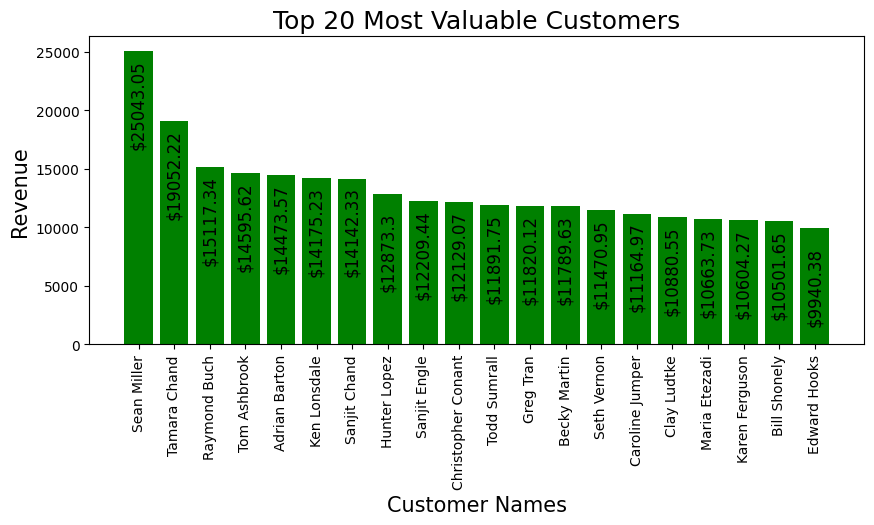

In [4]:

plt.figure(figsize = (10,4))                    # width and height of figure is defined in inches
 
plt.bar(Top_customers['Customer Name'],Top_customers['Sales'],color= 'green', linewidth = 1)   #creating the bar plot
plt.title("Top 20 Most Valuable Customers", fontsize=18)                             #title for the figure
plt.xlabel("Customer Names",fontsize=15)                                             #label for x axis 
plt.ylabel("Revenue",fontsize=15)                                                    #label for y axis
plt.xticks(fontsize=10, rotation=90)                                                 #customizing x axis ticks
plt.yticks(fontsize=10)                                                              #customizing y axis ticks
for k,v in Top_customers['Sales'].items():                                           #To show the exact revenue generated on the figure
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
plt.show()                                                                           #show the bar chart

By the above bar plot we can see that the person named Sean Miller is the most valueable person who buy more or higher-value products than the average customer

Let's find out which states generated the highest revenue!
Here are the Top 20 States which generated the highest revenue

In [5]:

# Sort the States as per the sales
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20)

# Round off the Sales Value up to 2 decimal places
Top_states = Top_states[["Sales"]].round(2)

# Since we have used groupby, we will have to reset the index to add the states into dataframe
Top_states.reset_index(inplace=True) 

print(Top_states)   

             State      Sales
0       California  446306.46
1         New York  306361.15
2            Texas  168572.53
3       Washington  135206.85
4     Pennsylvania  116276.65
5          Florida   88436.53
6         Illinois   79236.52
7         Michigan   76136.07
8             Ohio   75130.35
9         Virginia   70636.72
10  North Carolina   55165.96
11         Indiana   48718.40
12         Georgia   48219.11
13        Kentucky   36458.39
14         Arizona   35272.66
15      New Jersey   34610.97
16        Colorado   31841.60
17       Wisconsin   31173.43
18       Tennessee   30661.87
19       Minnesota   29863.15


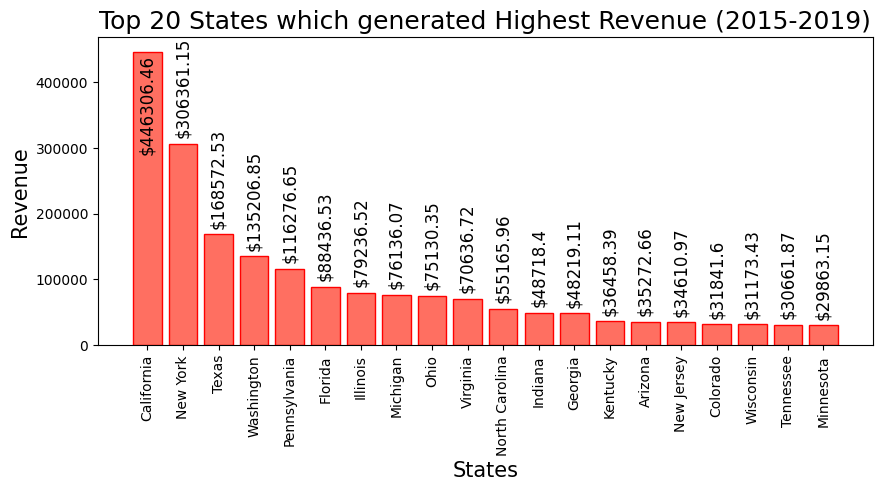

In [6]:

plt.figure(figsize = (10,4))                                                             # width and height of figure is defined in inches
plt.title("Top 20 States which generated Highest Revenue (2015-2019)", fontsize=18)                 #title for the figure
plt.bar(Top_states["State"], Top_states["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)   #creating the bar plot
plt.xlabel("States",fontsize=15)                                                                    #label for x axis 
plt.ylabel("Revenue",fontsize=15)                                                                   #label for y axis 
plt.xticks(fontsize=10, rotation=90)                                                                #customizing x axis ticks
plt.yticks(fontsize=10)                                                                             #customizing y axis ticks
for k,v in Top_states["Sales"].items():                                                #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
        

Here we can see that the largest revenue is generating from the state California and the second largest revenue is generating from New York

Similarly, Let's find out which cities generated highest revenue!
Here are the top 10 cities which generated the highest revenue

In [7]:
Top_cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_cities = Top_cities[["Sales"]].round(2)                                            # Round off the Sales Value up to 2 decimal places
Top_cities.reset_index(inplace=True)   # Since we have used groupby, we will have to reset the index to add the cities into the dataframe
#print(Top_cities)  

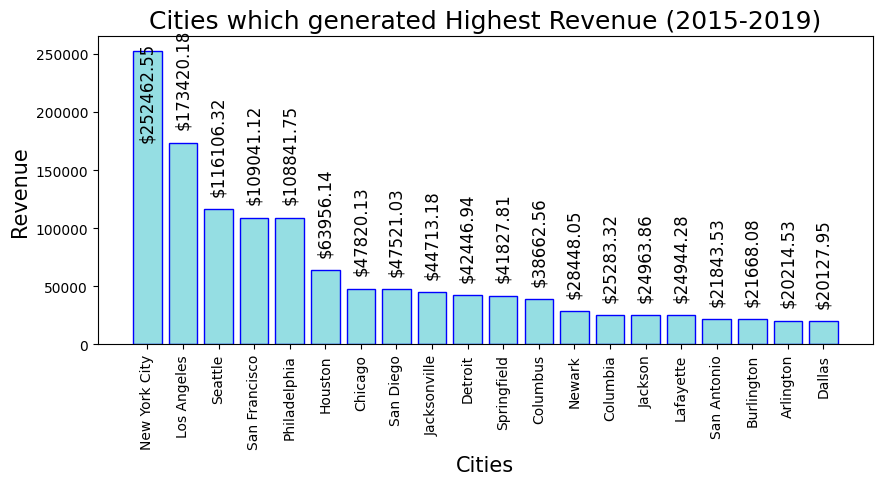

In [8]:
plt.figure(figsize = (10,4))                                                              # width and height of figure is defined in inches
plt.title("Cities which generated Highest Revenue (2015-2019)", fontsize=18)                          #title for the figure
plt.bar(Top_cities["City"], Top_cities["Sales"],color= '#95DEE3',edgecolor='blue', linewidth = 1)     #creating the bar plot
plt.xlabel("Cities",fontsize=15)                                                                      #label for x axis 
plt.ylabel("Revenue",fontsize=15)                                                                     #label for y axis                                                                 
plt.xticks(fontsize=10, rotation=90)                                                                  #customizing x axis ticks
plt.yticks(fontsize=10)                                                                               #customizing y axis ticks                                                                         
for k,v in Top_cities["Sales"].items():                                                   #To show the exact revenue generated on the figure
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

Here we can see that the largest revenue is generating from the city New York and the second largest revenue is generating from Los Angeles and so on

In [ ]:
#df.head()

In [83]:

df['Category'].value_counts()        #Display the distinct category count


Category
Office Supplies    5909
Furniture          2077
Technology         1813
Name: count, dtype: int64

For better understanding we can use pie chart

<Axes: ylabel='count'>

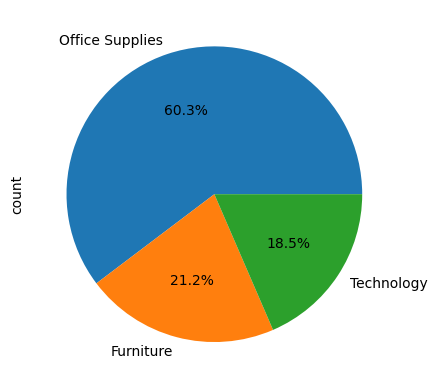

In [84]:
df['Category'].value_counts().plot(kind="pie",autopct='%1.1f%%')   #ploting a pie chart

This pie shows that more than 60 percent of the sale are from Ofiice supplies categories and very less 18.5% from Technology based categories

In [85]:
round(df.groupby('Category')['Sales'].sum())   #display the revenue generated from each category

Category
Furniture          728377.0
Office Supplies    705422.0
Technology         827456.0
Name: Sales, dtype: float64

<Axes: ylabel='Sales amount in %'>

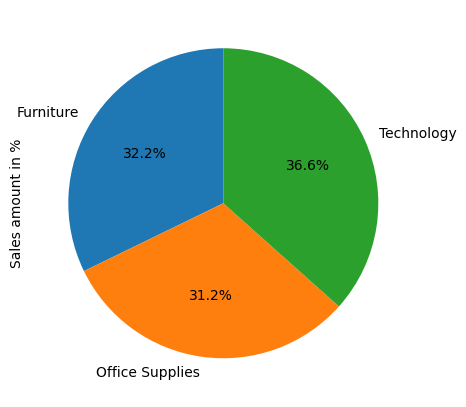

In [86]:
#ploting a pie chart
round(df.groupby('Category')['Sales'].sum()).plot(kind="pie",autopct='%1.1f%%',figsize=(5,6), ylabel='Sales amount in %',startangle=90)   

So from the previous two pie chats we can say that though technology category's sale is very less from other categories but the technology category is generating highest revenue from others.May be the technology based products are of high price. 
And where the office supplies category's sale is very high but it is generating less revenue from the others.

In [88]:
# Group by 'Category' and count occurrences of 'Sub-Category'
subcategory_counts = df.groupby('Category')['Sub-Category'].value_counts()

# Display the counts of subcategories within each category
print(subcategory_counts)

Category         Sub-Category
Furniture        Furnishings      931
                 Chairs           606
                 Tables           314
                 Bookcases        226
Office Supplies  Binders         1492
                 Paper           1338
                 Storage          832
                 Art              785
                 Appliances       459
                 Labels           357
                 Envelopes        248
                 Fasteners        214
                 Supplies         184
Technology       Phones           876
                 Accessories      756
                 Machines         115
                 Copiers           66
Name: count, dtype: int64


In [89]:
round(df[['Category','Sub-Category','Sales']].groupby(['Category','Sub-Category']).agg(['max','min','count']))

Sales             
                                  max    min count
Category        Sub-Category                      
Furniture       Bookcases      4405.0   35.0   226
                Chairs         4416.0   27.0   606
                Furnishings    1336.0    2.0   931
                Tables         4298.0   24.0   314
Office Supplies Appliances     2625.0    0.0   459
                Art            1113.0    1.0   785
                Binders        9893.0    1.0  1492
                Envelopes       605.0    2.0   248
                Fasteners        93.0    1.0   214
                Labels          786.0    2.0   357
                Paper           734.0    3.0  1338
                Storage        2934.0    4.0   832
                Supplies       8188.0    2.0   184
Technology      Accessories    3347.0    1.0   756
                Copiers       17500.0  300.0    66
                Machines      22638.0   12.0   115
                Phones         4549.0    3.0   876

Here we can better analyse the data that in which category how many sub-categories are there and what's the max sales,min sales and the count of each sub-categories sales

In [90]:
df['Segment'].value_counts()       #Display the distinct segment count


Segment
Consumer       5101
Corporate      2953
Home Office    1745
Name: count, dtype: int64

<Axes: ylabel='Sales amount in %'>

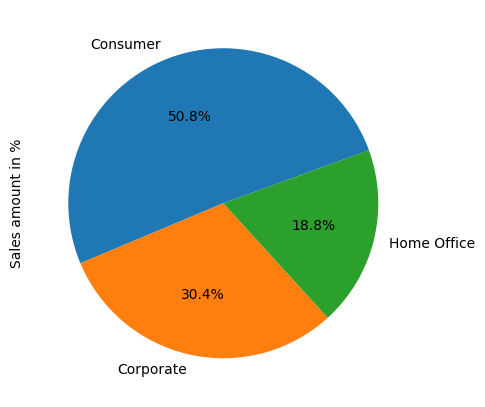

In [91]:
#ploting a pie chart for each segment according to the revenue generated
round(df.groupby('Segment')['Sales'].sum()).plot(kind="pie",autopct='%1.1f%%',figsize=(5,6), ylabel='Sales amount in %',startangle=20)     

More than 50% of the sales are coming from consumers and very less 18.8% from home offices

Let's find which Region has the highest sales

In [12]:
Top_region = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False) # Sort the Region as per the sales
Top_region = Top_region[["Sales"]].astype(int)                                  # Cast Sales column to integer data type
# Since we have used groupby, we will have to reset the index to add the Region column into the data frame
Top_region.reset_index(inplace=True) 
print(Top_region)

    Region   Sales
0     West  710219
1     East  669518
2  Central  492646
3    South  389151


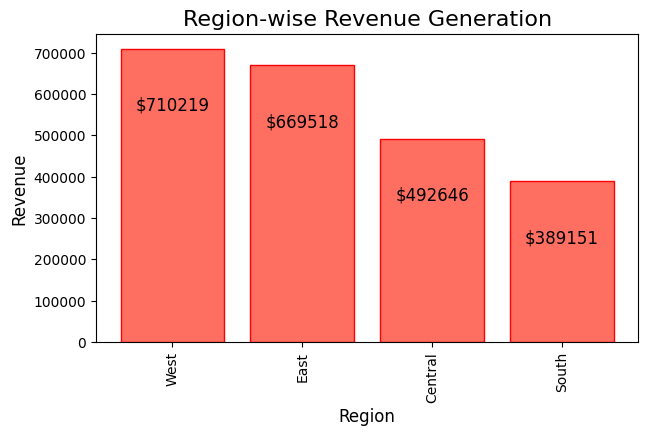

In [17]:
plt.figure(figsize = (7,4))                                                            # width and height of figure is defined in inches
plt.title("Region-wise Revenue Generation", fontsize=16)                               #title for the figure
plt.bar(Top_region["Region"], Top_region["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)  #creating the bar plot
plt.xlabel("Region",fontsize=12)                                                        # x axis shows the Region 
plt.ylabel("Revenue",fontsize=12)                                                       # y axis show the Revenue generated
plt.xticks(fontsize=10, rotation=90)                                                    #customizing x axis ticks
plt.yticks(fontsize=10)                                                                 #customizing y axis ticks
for k,v in Top_region["Sales"].items():                                                 #To show the exact revenue generated on the figure
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');

We can clearly see that from the West region the revenue generation is high and from south revenue generation is very low.

In [93]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017


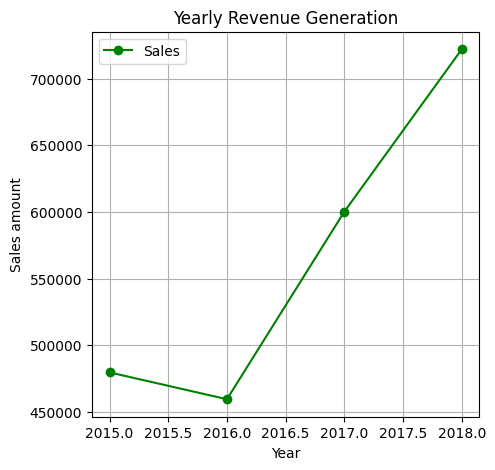

In [94]:
# Plotting the line plot for sales of every year

plt.figure(figsize=(5, 5))
yearly_sales = df.groupby('Order Year')['Sales'].sum().reset_index()

plt.plot(yearly_sales['Order Year'], yearly_sales['Sales'], marker='o', label='Sales',color='green')

plt.xlabel('Year')                            # Add appropriate label for x-axis
plt.ylabel('Sales amount')                    # Add appropriate label for y-axis
plt.grid(True)                                #giving grid to the chart
plt.title('Yearly Revenue Generation')        # Add the title of the plot
plt.legend()                                  # Show legend with year-wise sales lines
plt.show()

We can see that from 2015 to 2016 the sales decreases little bit and from 2016 the sales increases rapidly

In [95]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5858
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

<Axes: ylabel='Sales amount in %'>

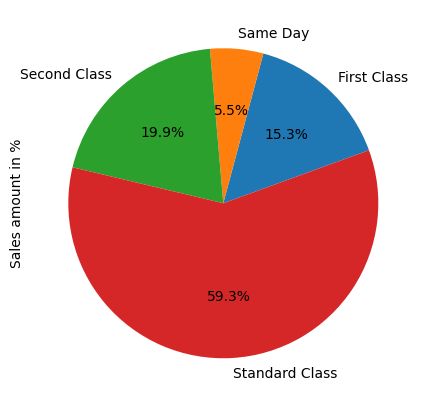

In [96]:
#ploting a pie chart for each ship mode according to the revenue generated
round(df.groupby('Ship Mode')['Sales'].sum()).plot(kind="pie",autopct='%1.1f%%',figsize=(5,6), ylabel='Sales amount in %',startangle=20)     

We can see that Shipping mode - Standard Class generated the highest percentage of revenue of about 59.3%

In [97]:
#save the file
df.to_csv('cleaned_superstore_sales_data.csv',index=False)